# Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to the python environment.

In [2]:
#Loading the dataset
data=pd.read_excel(r'C:\Users\USER\Downloads/iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
#Checking for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

# Do necessary pre-processing steps.

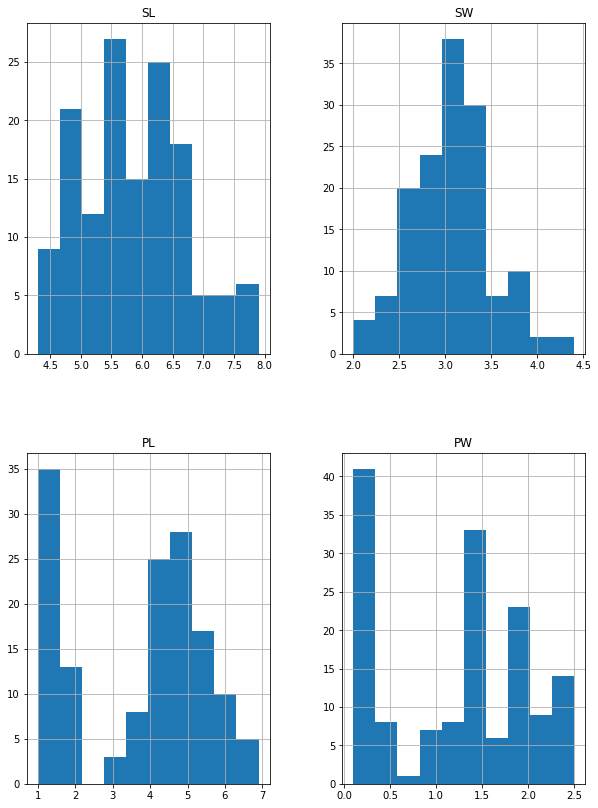

In [7]:
#plotting the entire float values in Histogram
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,14))
plt.show()

In [8]:
#Filling the missing values using mode
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [9]:
#Checking the null values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

[]

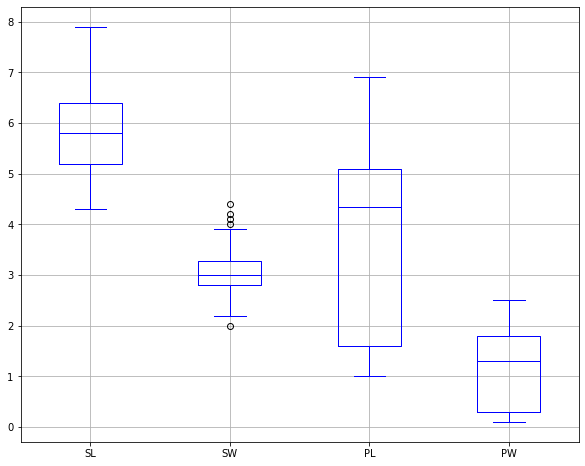

In [10]:
#Checking outliers
plt.figure(figsize=(10,8))
data.boxplot(return_type='dict',color='blue')
plt.plot()

In [11]:
#Fixing the outliers in SW
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
Up_lim=Q3+(1.5*IQR)
print('lower limit is',low_lim)
print('Upper limit is',Up_lim)
outlier=[]
for x in data['SW']:
    if(x>Up_lim)or(x<low_lim):
        outlier.append(x)
outlier

Q1: 2.8
Q2: 3.0
Q3: 3.25
lower limit is 2.1249999999999996
Upper limit is 3.9250000000000003


[4.0, 4.4, 4.1, 4.2, 2.0]

In [12]:
ind_val=data[(data['SW']>Up_lim) |(data['SW']<low_lim)]
ind_val.index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [13]:
data.drop([14, 15, 32, 33,60],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x172d7c6fb80>,
 'caps': [<matplotlib.lines.Line2D at 0x172d7c7e1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x172d7c6f7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x172d7c7e8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x172d7c7ec70>],
 'means': []}

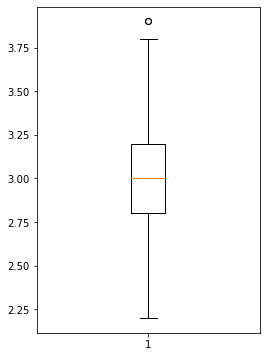

In [14]:
# Boxplot of SW
plt.figure(figsize=(4,6))
plt.boxplot(data['SW'])

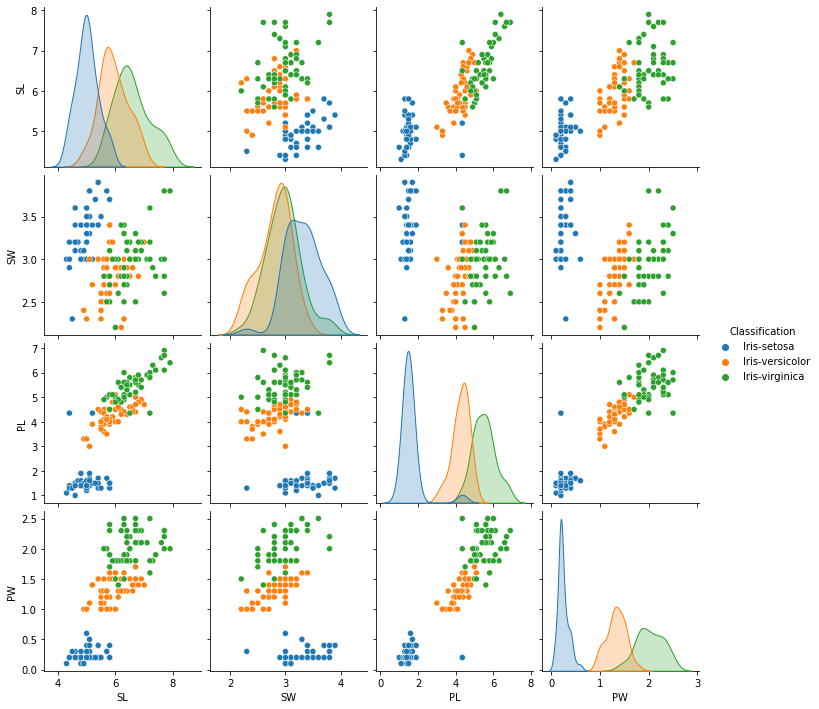

In [15]:
sns.pairplot(data=data,hue='Classification')
plt.show()

# Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [16]:
# Separating the data into dependent and independent variables
X=data.drop(['Classification'],axis=1)
y=data['Classification']

In [17]:
#Perform Label encoding 
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
y=label_en.fit_transform(y)

In [18]:
#Performing Min Max scaling 
from sklearn import preprocessing  
min_max = preprocessing.MinMaxScaler(feature_range =(0,1))
X = min_max.fit_transform(X)

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [20]:
X_train.shape

(116, 4)

In [21]:
#Trainig the models

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        29
   macro avg       0.94      0.94      0.93        29
weighted avg       0.94      0.93      0.93        29

[[9 0 0]
 [0 9 0]
 [0 2 9]]
accuracy is 0.9310344827586207


In [24]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29

[[9 0 0]
 [0 8 1]
 [0 2 9]]
accuracy is 0.896551724137931


In [25]:
#SVM
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29

[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]
accuracy is 0.9310344827586207


In [26]:
#Decisin Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29

[[9 0 0]
 [0 8 1]
 [0 2 9]]
accuracy is 0.896551724137931


In [27]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,max_depth=10,random_state =42,criterion='entropy',max_features='log2')
classifer = rf.fit(X_train,y_train) 
y_predict = classifier.predict(X_test) 

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29

[[9 0 0]
 [0 8 1]
 [0 2 9]]
accuracy is 0.896551724137931


In [28]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
model = gb.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29

[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]
accuracy is 0.9310344827586207


We have used all the supervised learning methods to find out the best model for iris data set.From this, we can conclude that Logistic Regression ,Gradient Boosting and SVM shows the best accuracy prediction.